<a href="https://colab.research.google.com/github/smeissa2019/MachineLearning/blob/master/Classification_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [14]:
!pip install google_images_download

In [0]:
from fastai import *
from fastai.vision import *
from google_images_download import google_images_download 
import pandas as pd
import codecs

In [0]:
folder = 'downloads'

In [0]:
path = Path('Class')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
path.ls()

[PosixPath('Class/downloads')]

In [23]:
dest.ls()

[PosixPath('Class/downloads/rose flower'),
 PosixPath('Class/downloads/daisy flower')]

In [20]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/class"
base_dir = path

Mounted at /content/gdrive


In [0]:
## Preparing the data - Stage

In [21]:
response = google_images_download.googleimagesdownload()  
search_query = [ 'daisy flower', 'rose flower' ] 


def downloadimages(query): 
        arguments = {"keywords": query, "format": "jpg", "limit":50, "print_urls":True, "size": "medium",}
        try: 
             response.download(arguments) 
        except FileNotFoundError: 
             arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":50, 
                     "print_urls":True,  
                     "size": ">400*300"}
        try: 
            
            response.download(arguments) 
        except: 
            pass 
        

for query in search_query:
    downloadimages(query)


Item no.: 1 --> Item name = daisy flower
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/daisy-flower-1532449822.jpg?crop=0.752xw:1.00xh;0.125xw,0&resize=640:*
Completed Image ====> 1.daisy-flower-1532449822.jpg
Image URL: https://www.thespruce.com/thmb/1ZiumBptMPxrgD3ebcwOVQCZ-10=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1004261968-5b8d9cb946e0fb0025f5f51b.jpg
Completed Image ====> 2.GettyImages-1004261968-5b8d9cb946e0fb0025f5f51b.jpg
Image URL: https://www.edenbrothers.com/store/media/Seeds-Mixes/resized/SMISP114-1_medium.jpg
Completed Image ====> 3.SMISP114-1_medium.jpg
Image URL: https://cdn2.stylecraze.com/wp-content/uploads/2013/11/Top-25-Most-Beautiful-Daisy-Flowers.jpg
Completed Image ====> 4.Top-25-Most-Beautiful-Daisy-Flowers.jpg
Image URL: https://img.pixers.pics/pho_wat(s3:700/FO/34/25/02/87/700_FO34250287_627098294fb2828a1a25288217139939.jpg,700,582,cms:2018/10/5bd1b6b8d04b8_220x50-wate

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [26]:
data.classes

['daisy flower', 'rose flower']

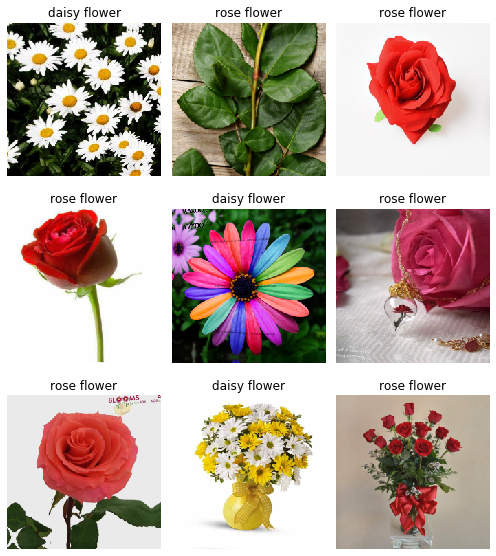

In [27]:
data.show_batch(rows=3, figsize=(7,8))

In [28]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['daisy flower', 'rose flower'], 2, 82, 20)

In [0]:
##Training the model- Stage

In [29]:
learn = cnn_learner(data, models.resnet34, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 36.1MB/s]


In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.727741,1.629791,0.750000,00:03
1,1.412222,0.423137,0.100000,00:02
2,1.016926,0.433953,0.050000,00:02
3,0.765862,0.464912,0.050000,00:02


In [0]:
learn.save('step1')

In [32]:
learn.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (82 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rose flower,rose flower,rose flower,rose flower,rose flower
Path: Class;

Valid: LabelList (20 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rose flower,daisy flower,daisy flower,rose flower,rose flower
Path: Class;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


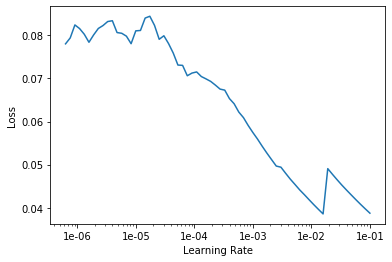

In [36]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.058904,0.448775,0.050000,00:02
1,0.048716,0.433610,0.050000,00:02


In [0]:
learn.save('step2')

In [0]:
##Interpretation -Stage

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

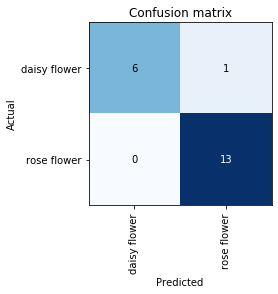

In [41]:
interp.plot_confusion_matrix()

In [0]:
##Cleaning UP -Stage

In [0]:
from fastai.widgets import*

In [0]:
#I did not have to do this stage as I got very good prediction in the matrix above

In [0]:
## Production - Stage

In [0]:
learn.export()